In [23]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pretrain_res = json.load(open("pretrain_res.json", "r"))

In [13]:
models = []
fixing_noise_stds = []
skipping_frames = []

train_losses = []
val_losses = []
val_accs = []

In [14]:
for model_name, values in pretrain_res.items():
    model = model_name.split("_")[0]
    models.append(model)
    
    fixing_noise_std = True if values["config"]["input_name"] == "input" else False
    fixing_noise_stds.append(fixing_noise_std)
    
    skipping_frame = True if values["config"]["interval_skip"] == 1 else False
    skipping_frames.append(skipping_frame)
    
    train_losses.append(values["train_losses"])
    val_losses.append(values["val_losses"])
    val_accs.append(values["val_accs"])

In [33]:
model_types = ["baseline", "unipose", "unipose2", "deciwatch"]
setups = ["varying_std_all_frames", "varying_std_skipping_frames", "fixed_std_all_frames"]

for model_type in model_types:
    os.mkdir(f"./{model_type}/")
    for setup in setups:
        os.mkdir(f"./{model_type}/{setup}/")

FileExistsError: [Errno 17] File exists: './baseline/'

/var/folders/97/dxrwnb1x3h91kmmj6htw3_n00000gn/T/ipykernel_7817/1614528264.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


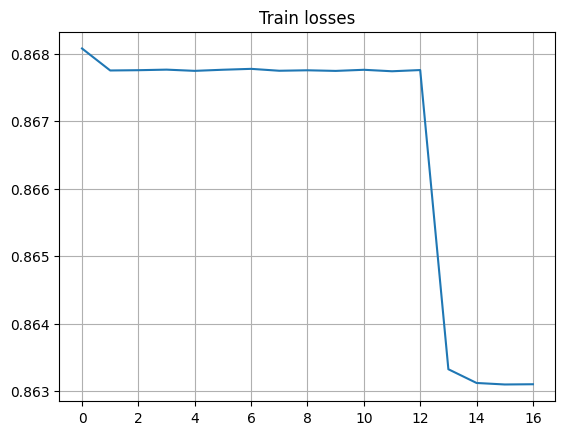

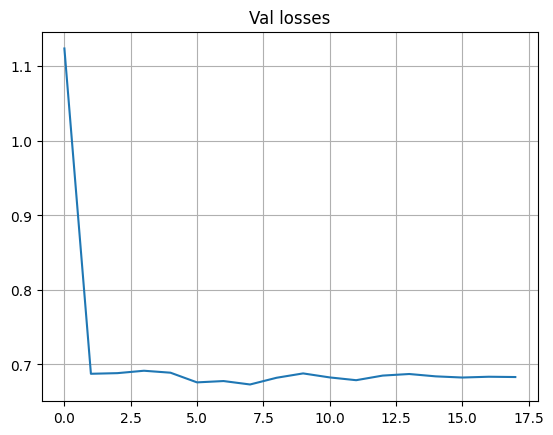

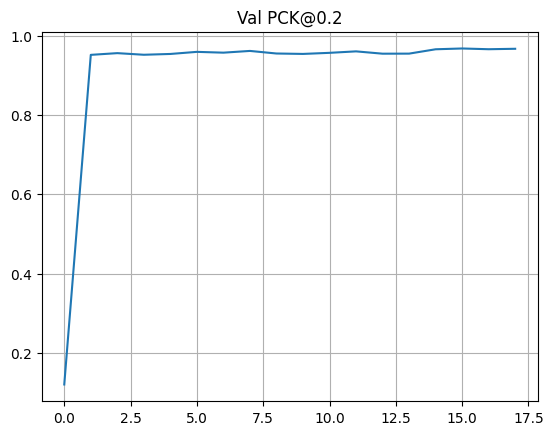

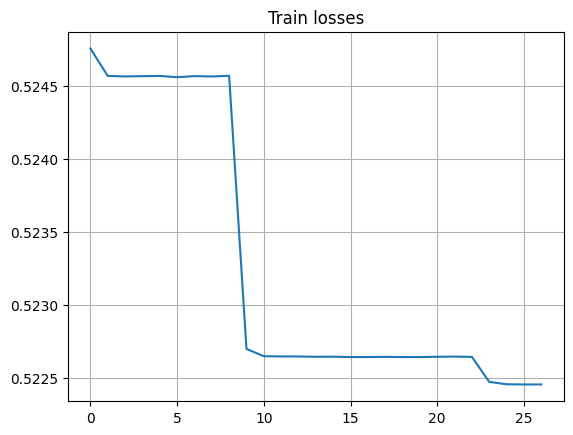

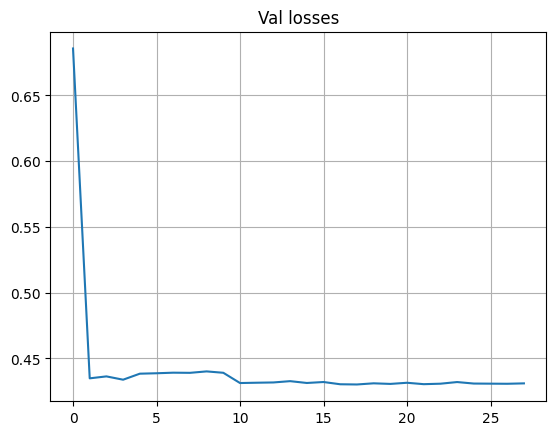

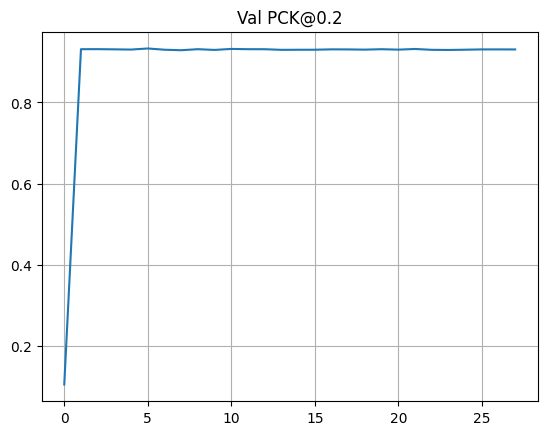

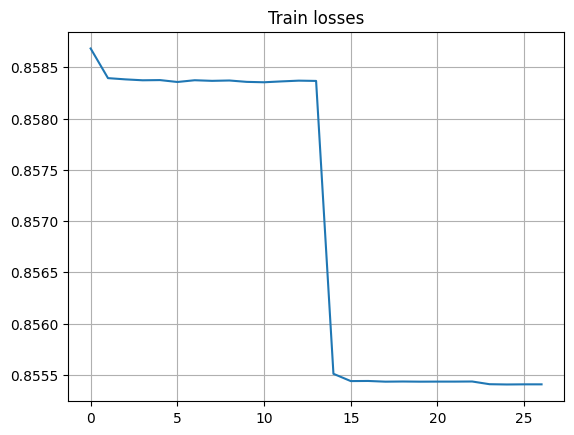

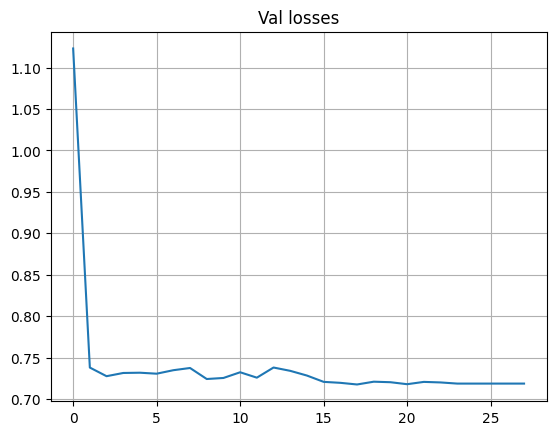

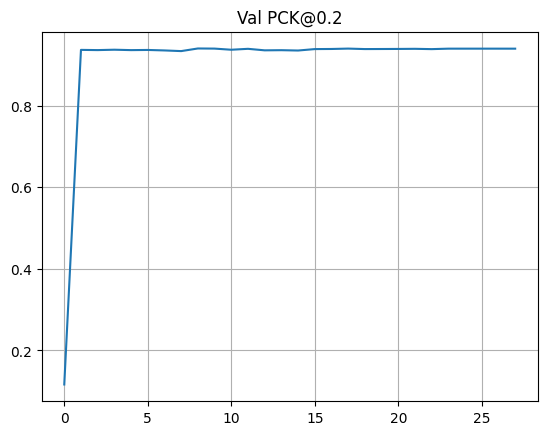

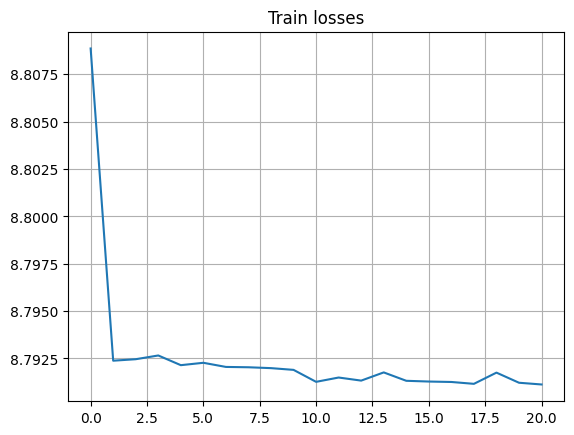

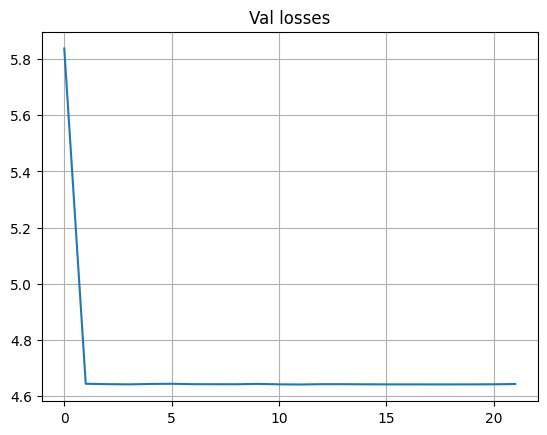

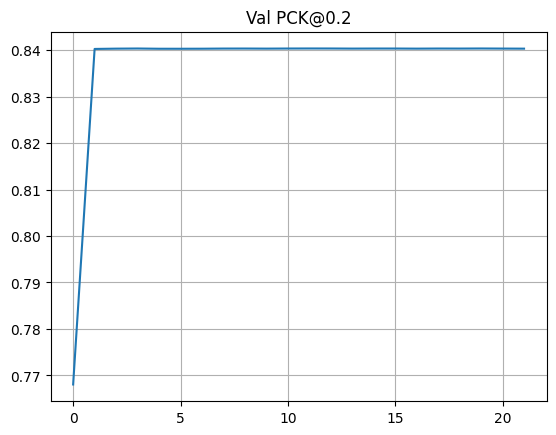

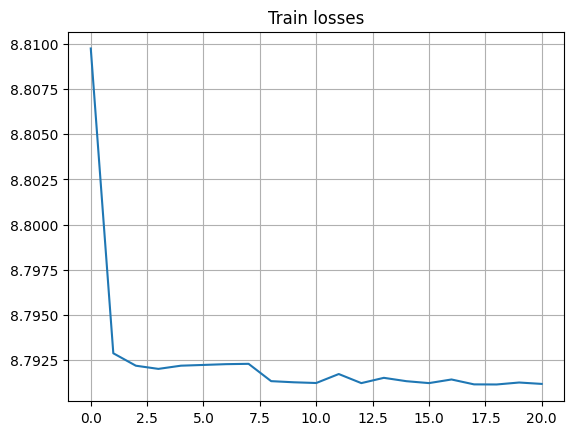

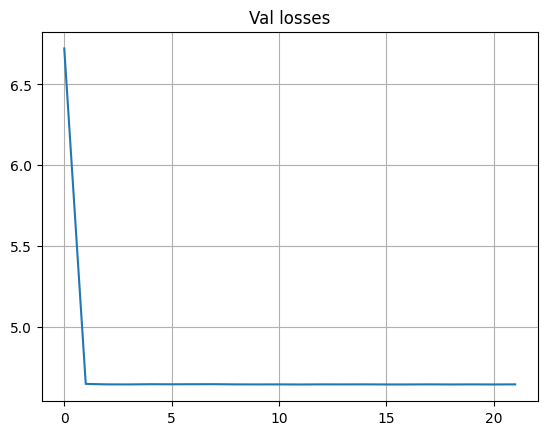

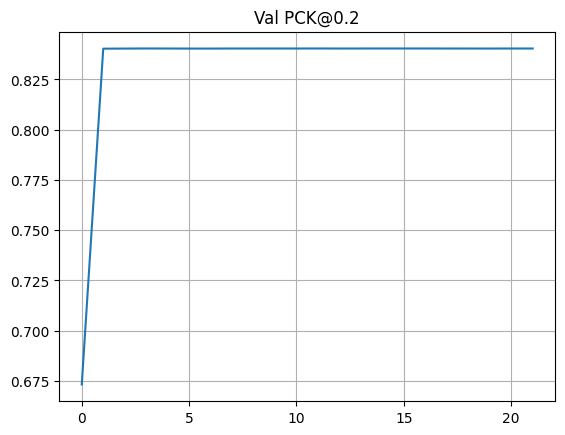

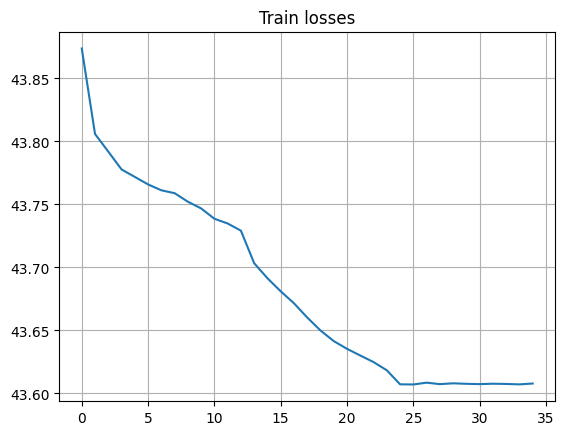

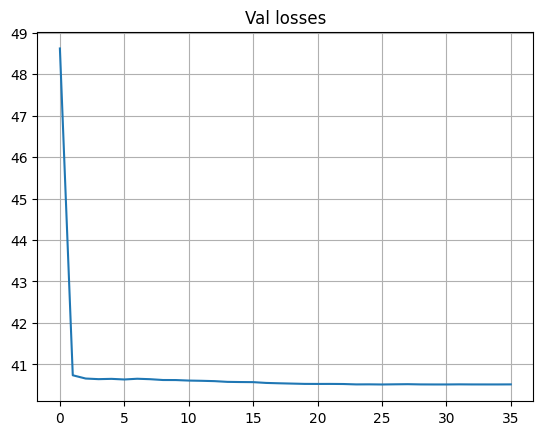

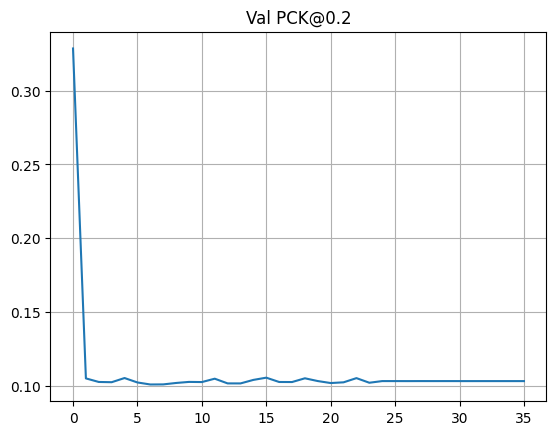

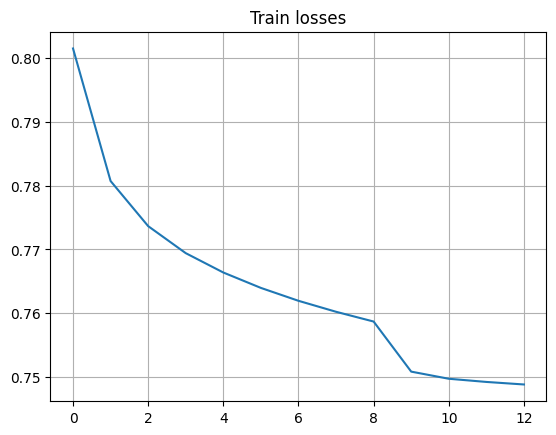

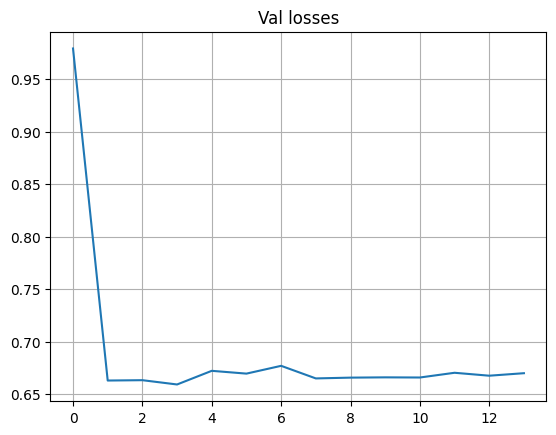

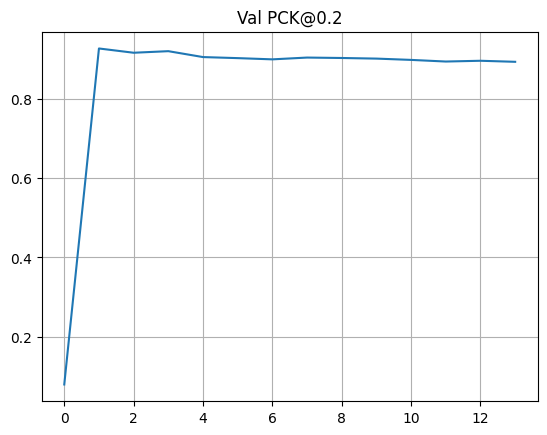

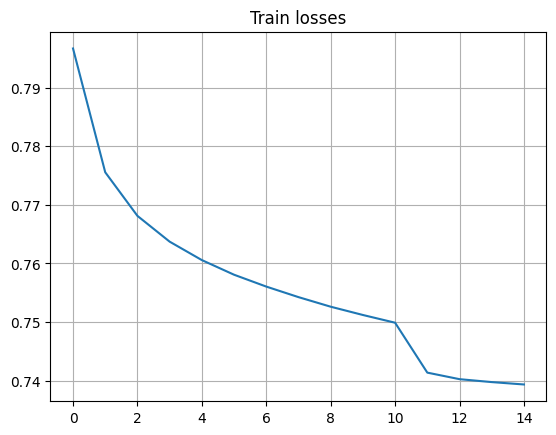

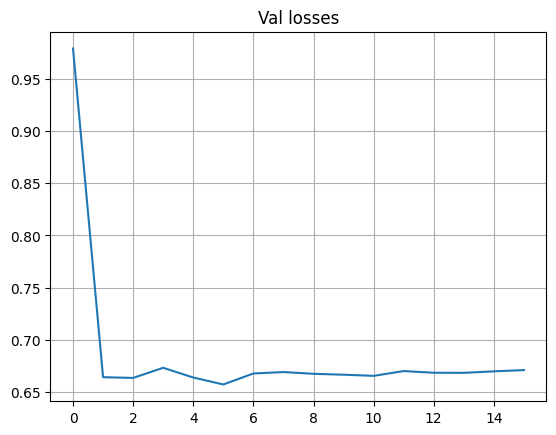

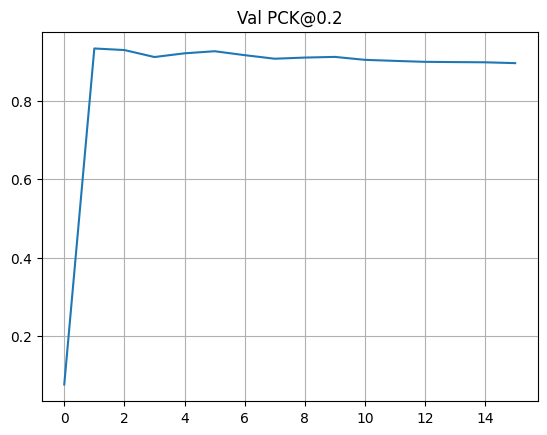

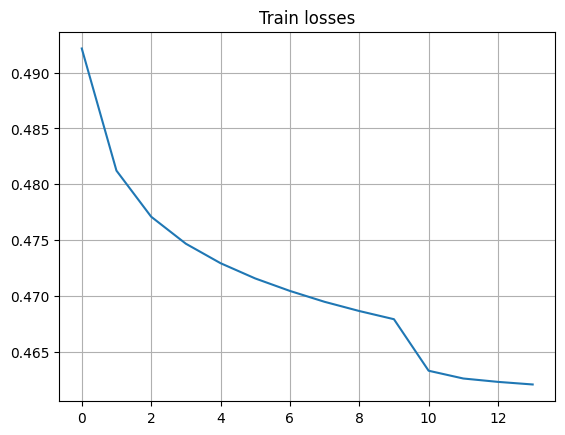

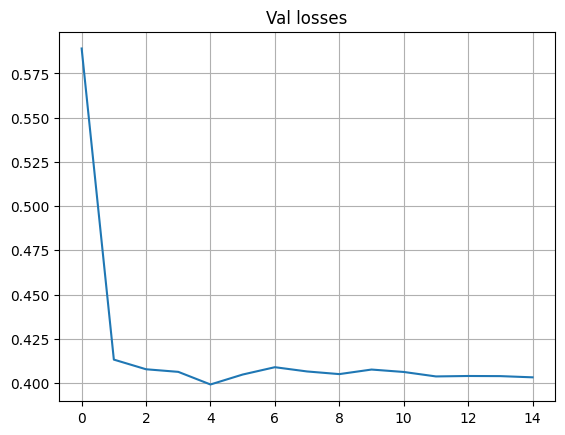

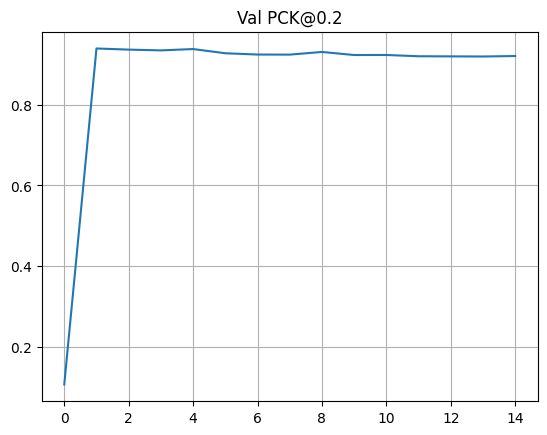

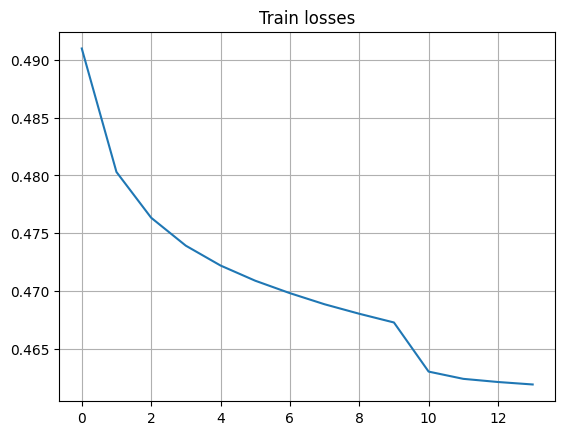

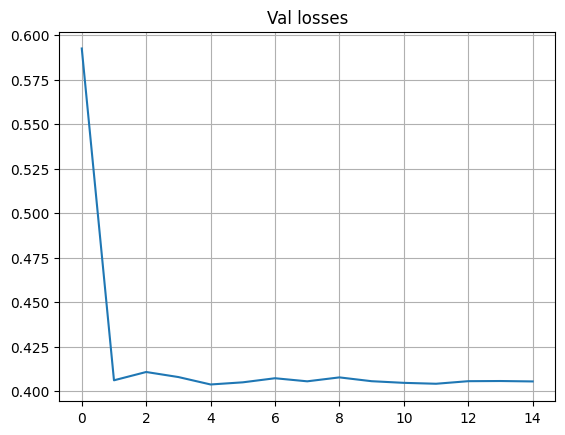

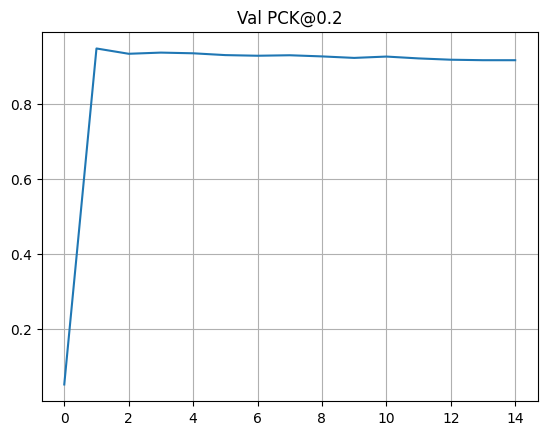

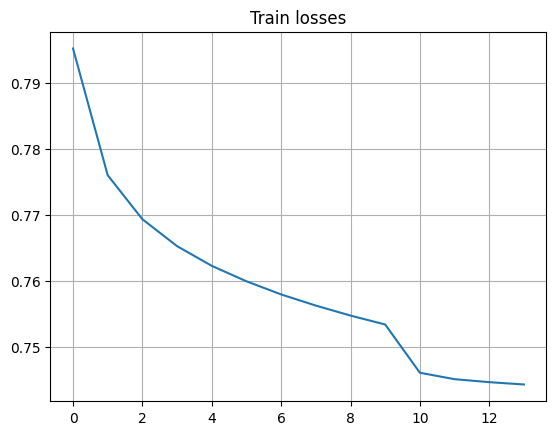

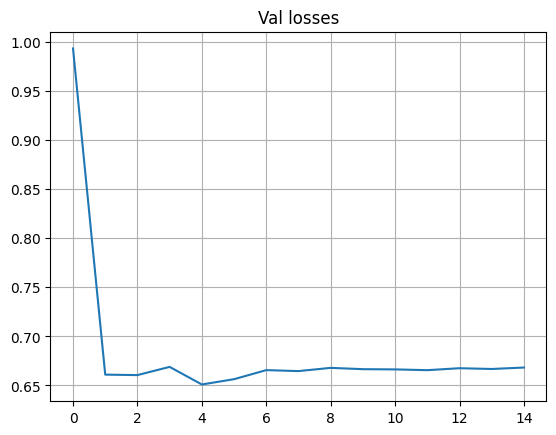

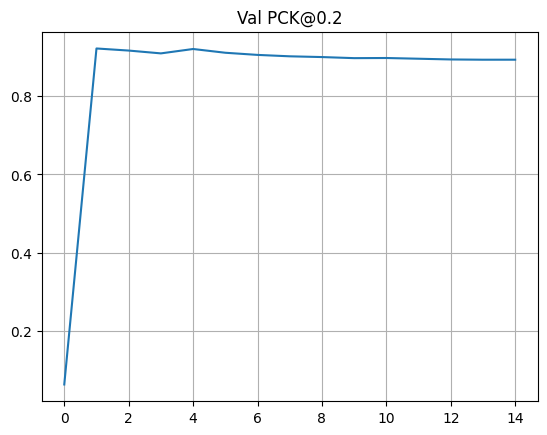

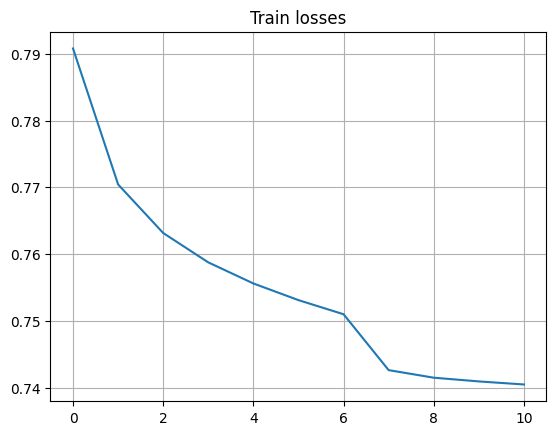

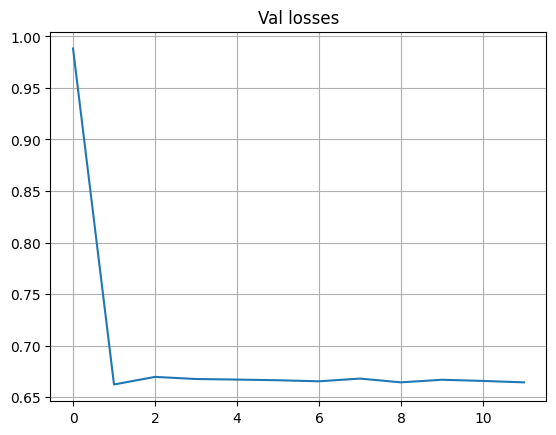

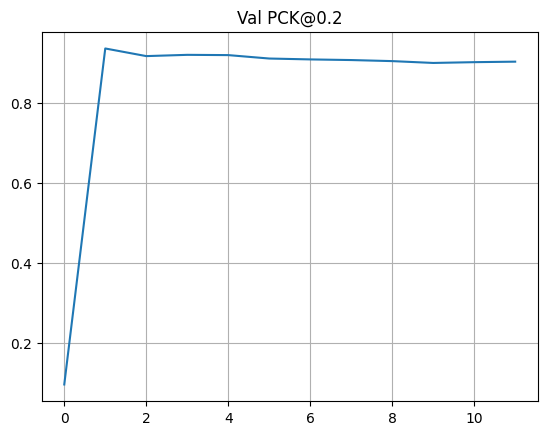

In [36]:
for model, fixing_noise_std, skipping_frame, train_loss, val_loss, val_acc in zip(models, fixing_noise_stds, skipping_frames, train_losses, val_losses, val_accs):
    
    if fixing_noise_std:
        subdir = "fixed_std_all_frames"
    elif (not fixing_noise_std) and skipping_frame:
        subdir = "varying_std_skipping_frames"
    elif (not fixing_noise_std) and (not skipping_frame):
        subdir = "varying_std_all_frames"
    
    train_xs = np.arange(len(train_loss))
    val_xs = np.arange(len(val_loss))
    
    plt.figure()
    plt.plot(train_xs, train_loss)
    plt.title("Train losses")
    plt.grid()
    plt.savefig(f"./{model}/{subdir}/train_losses.png")
    
    plt.figure()
    plt.plot(val_xs, val_loss)
    plt.title("Val losses")
    plt.grid()
    plt.savefig(f"./{model}/{subdir}/val_losses.png")
    
    plt.figure()
    plt.plot(val_xs, val_acc)
    plt.title("Val PCK@0.2")
    plt.grid()
    plt.savefig(f"./{model}/{subdir}/val_accs.png")